In [7]:
from os import listdir
import patch_processing as PP

In [8]:
def meta_folder_patches(path, size, patch_count,threshold) :
    for directory in listdir(path) :
        good = PP.extract(path + "/" + directory + '/Good/Prediction', size, patch_count)
        bad = PP.extract(path + "/" + directory + '/Bad/Prediction', size, patch_count)
        
        print(directory + " (good, pre filter) : ")
        PP.stats(good)
        print(directory + " (bad, pre filter) : ")
        PP.stats(bad)
        
        good = PP.filter(good, size, threshold)
        bad = PP.filter(bad, size, threshold)
        
        print(directory + " (good, post filter) : ")
        PP.stats(good)
        print(directory + " (bad, post filter) : ")
        PP.stats(bad)
        
        PP.save(bad, './Data/test/Bad/',directory+"_bad")
        PP.save(good, './Data/test/Good/',directory+"_good")
        print("================================================================================")

In [9]:
SIZE = 320 # Hauteur/Largeur de chaque patch (carré), set pour l'extraction et le filtre

Il y a 1050 patches


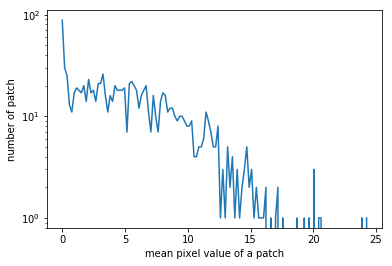

Il y a 1225 patches


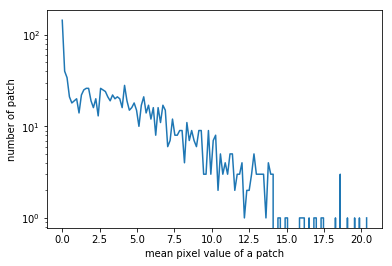

In [11]:
#################### Extraction des patches ####################
good_patches = PP.extract("./Data/All_good",SIZE,patch_count=10)
bad_patches = PP.extract("./Data/All_bad",SIZE,patch_count=5)

#Servez vous de l'histogramme pour déterminer un bon THRESHOLD pour la fonction filter
PP.stats(good_patches)
PP.stats(bad_patches)

Il y a 692 patches


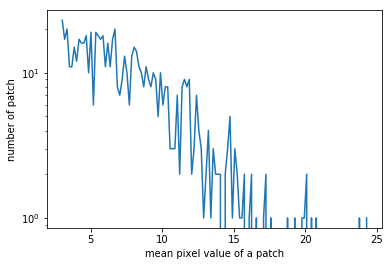

Il y a 675 patches


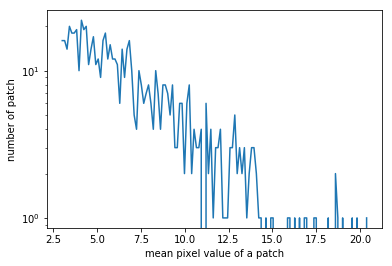

In [16]:
#################### Filtrage des patches ####################
THRESHOLD = 3
good_patches = PP.filter(good_patches, SIZE, THRESHOLD)
bad_patches = PP.filter(bad_patches, SIZE, THRESHOLD)

#Essayez d'à peu près équilibrer le nombre de patches dans chaque catégorie avant de les sauvegarder
#Pour cela, changez la valeur des paramètres "patch_count" dans l'étape précédente
PP.stats(good_patches)
PP.stats(bad_patches)

In [18]:
#################### Sauvegarde ####################
PP.save(good_patches, './Data/test/Good/',"Good")
PP.save(bad_patches, './Data/test/Bad/',"Bad")
